## **ML-Model to detect gender age based on his/her voice**   
In this notebook, I am using a common-voice dataset to train a model for detecting age of
a person based on his/her voice

### **Stepwise ML-model development**  
This notebook is created for beginners to develop age detection ml-model with stepwise approach using common-voice dataset.
The notebook include following steps:
* Data Collection
* Data Pre-processing
* Feature Engineering
* Model Selection
* Model Analysis
* Model Deployment

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Step-01 Data Collection**  
In this step the data is loaded and explored. The data is understood with basic graphs and to check if the dataset is balanced.

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns # visualizing data with stunning default theme
import sklearn # contain algorithms
import warnings
warnings.filterwarnings('ignore')

# load dataset from input directory
df = pd.read_csv("/content/drive/MyDrive/Data/Diss/cv-valid-train.csv")
df[df['age'].notna()].head()
df =  df.head(int(len(df)*0.50))
print(len(df))
df.tail()

97888


,filename,text,up_votes,down_votes,age,gender,accent,duration
97883,cv-valid-train/sample-097883.mp3,i'm gonna get my arm fixed out of this,2,0,NaN,NaN,NaN,NaN
97884,cv-valid-train/sample-097884.mp3,my seven year resume gap is marked not drugs,3,0,NaN,NaN,NaN,NaN
97885,cv-valid-train/sample-097885.mp3,another person was there to help him toward hi...,3,0,thirties,male,NaN,NaN
97886,cv-valid-train/sample-097886.mp3,i looked at the cylinder again and was complet...,2,1,NaN,NaN,NaN,NaN
97887,cv-valid-train/sample-097887.mp3,he could see that the old man wanted to know m...,3,0,NaN,NaN,NaN,NaN


In [5]:
df_test = pd.read_csv("/content/drive/MyDrive/Data/Diss/cv-valid-test.csv")
df_test[df_test['age'].notna()].tail()

,filename,text,up_votes,down_votes,age,gender,accent,duration
3976,cv-valid-test/sample-003976.mp3,we've got her located,1,0,thirties,male,england,NaN
3979,cv-valid-test/sample-003979.mp3,she has all your features,1,0,thirties,male,NaN,NaN
3980,cv-valid-test/sample-003980.mp3,i've got to see nicole right away,1,0,fifties,male,australia,NaN
3984,cv-valid-test/sample-003984.mp3,but there were certain of them who took a bit ...,2,0,thirties,male,NaN,NaN
3989,cv-valid-test/sample-003989.mp3,i'm playing for keeps,2,0,fifties,male,australia,NaN


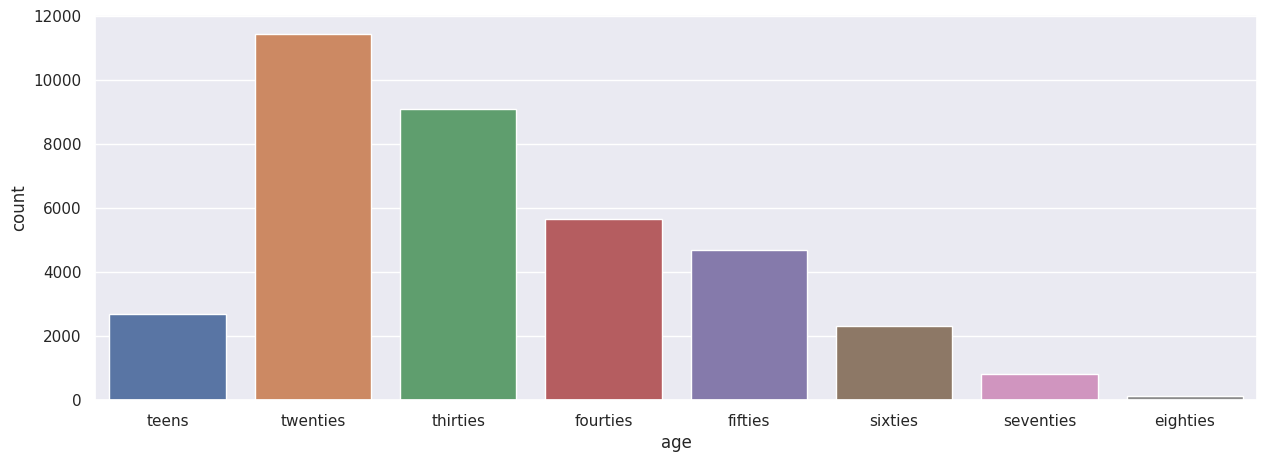

In [6]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.countplot(x="age",
        data=df[df['age'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()


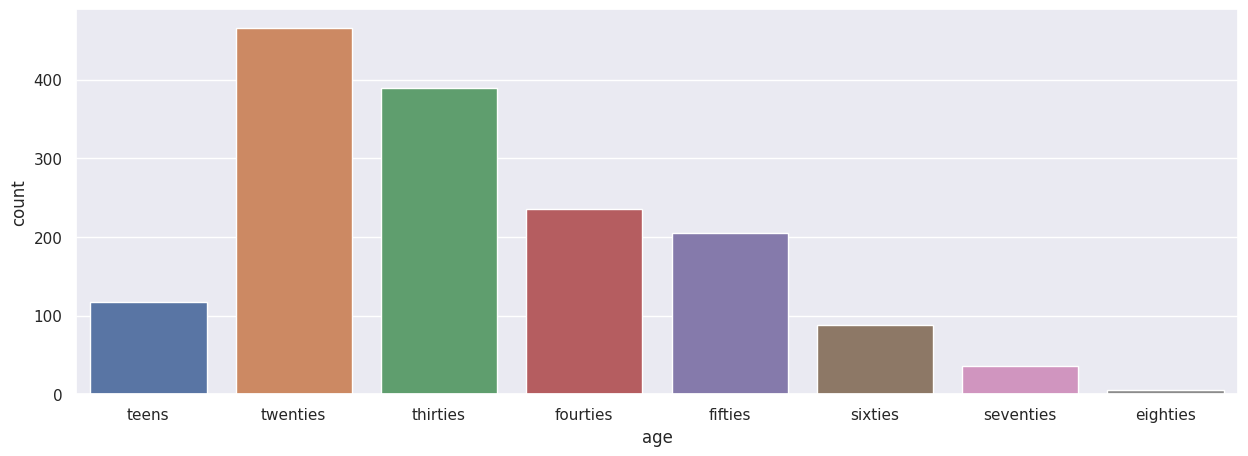

In [7]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.countplot(x="age",
        data=df_test[df_test['age'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

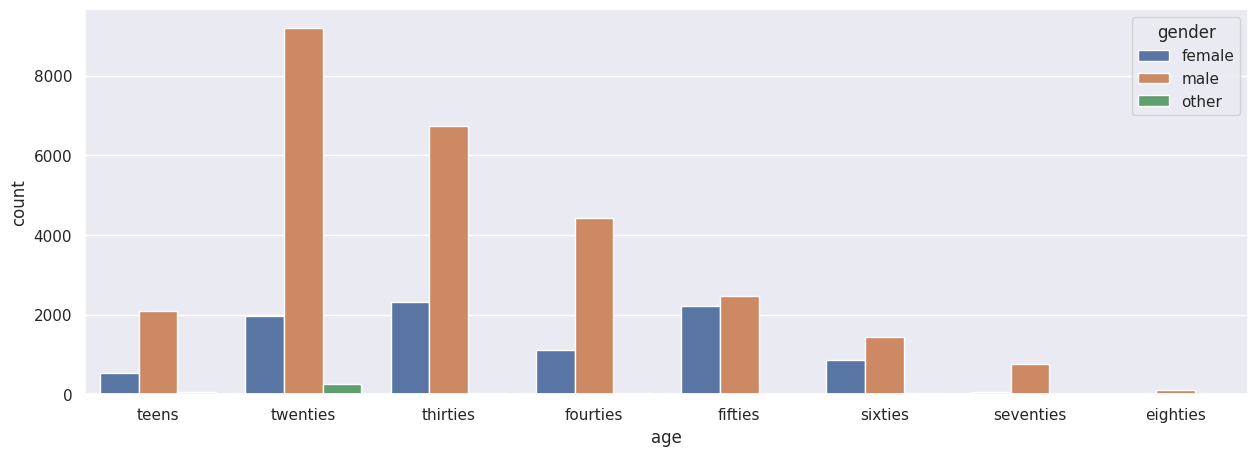

In [8]:
sns.countplot(x="age",
        hue='gender',
        data=df[df['age'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

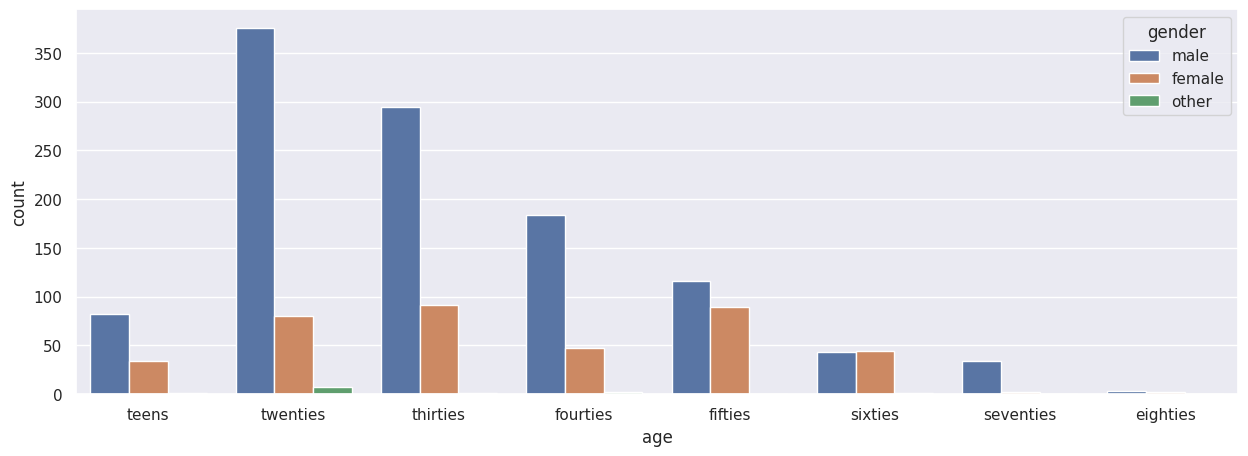

In [9]:
sns.countplot(x="age",
        hue='gender',
        data=df_test[df_test['age'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

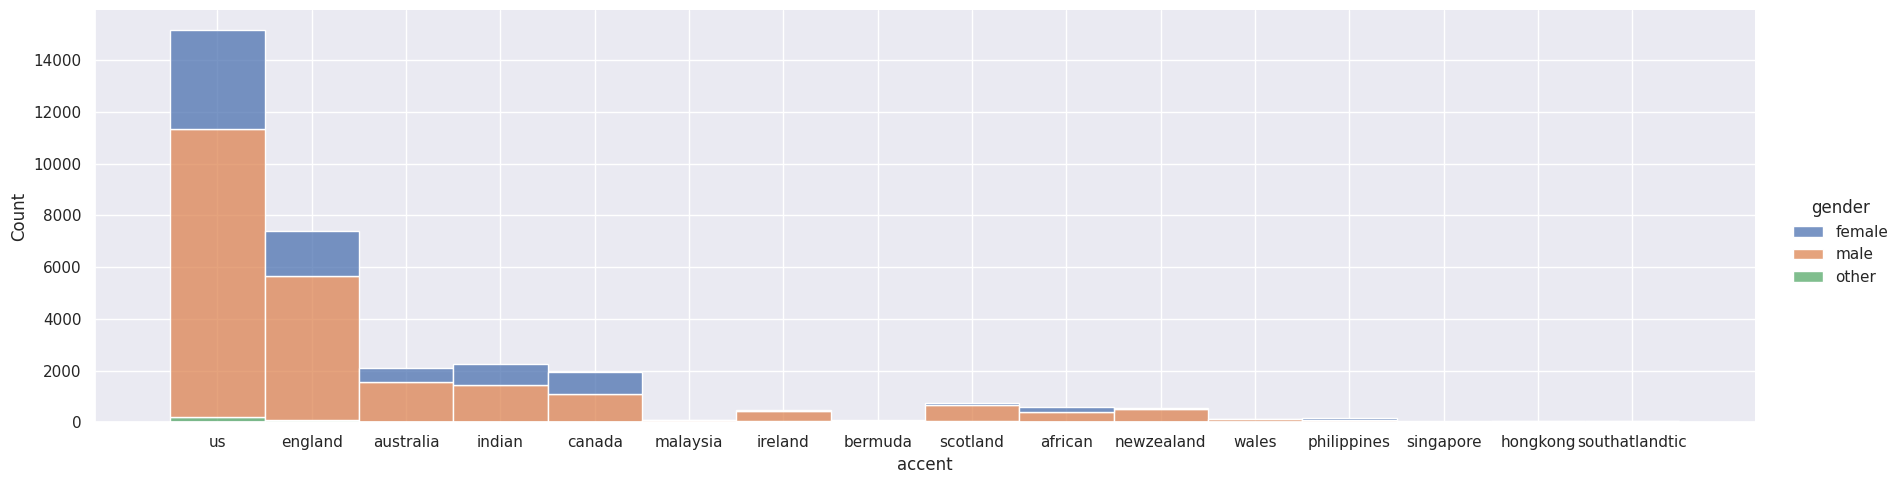

In [10]:
sns.displot(x="accent",
        data=df[df['accent'].notna()],
        hue='gender',
        multiple='stack',
        height=5, aspect=18/5)

plt.show()

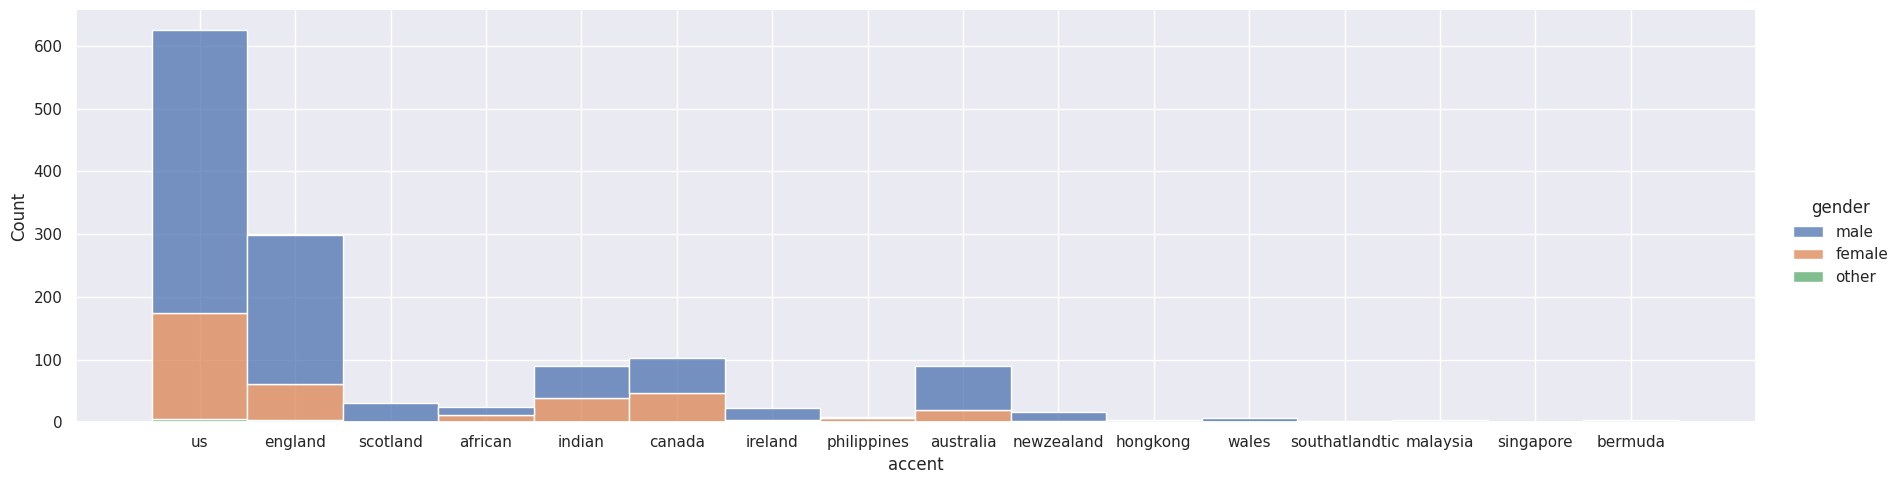

In [11]:
sns.displot(x="accent",
        data=df_test[df_test['accent'].notna()],
        hue='gender',
        multiple='stack',
        height=5, aspect=18/5)

plt.show()

initial: (97888, 8) final: (31546, 8)


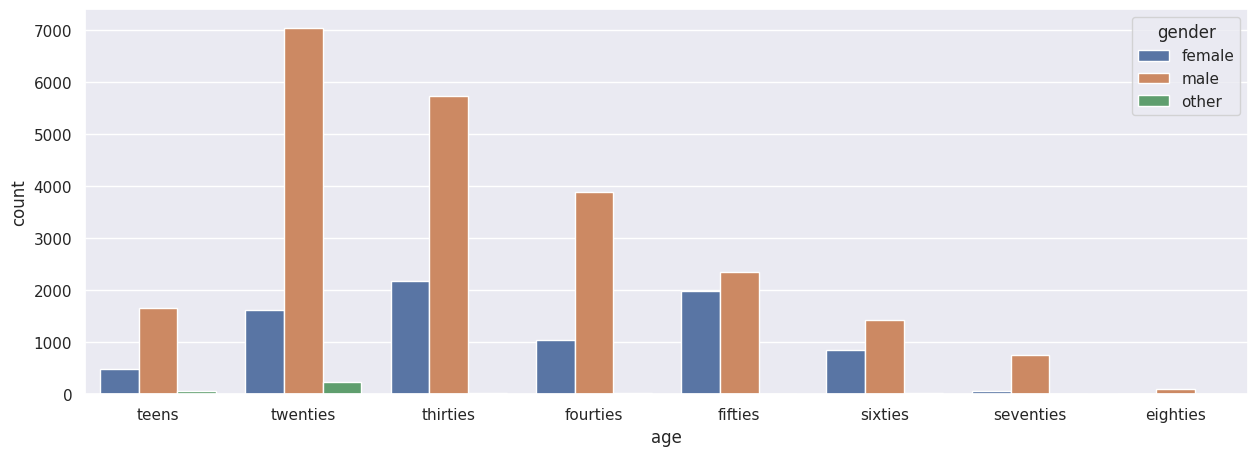

In [12]:
#del df['duration']
start=df.shape
#df.isna().sum()
end = df[df['age'].notna()& df['gender'].notna() & df['accent'].notna()].shape
print("initial: {} final: {}".format(start, end))
sns.countplot(x="age",
        hue='gender',
        data=df[df['age'].notna()& df['gender'].notna() & df['accent'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

initial: (3995, 8) final: (1320, 8)


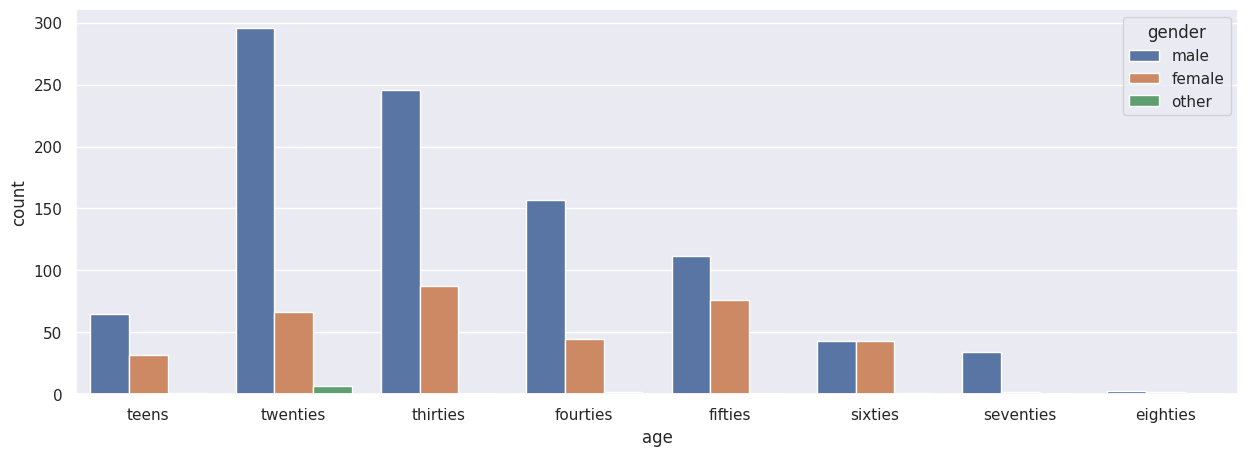

In [13]:
#del df['duration']
start=df_test.shape
#df.isna().sum()
end = df_test[df_test['age'].notna()& df_test['gender'].notna() & df_test['accent'].notna()].shape
print("initial: {} final: {}".format(start, end))
sns.countplot(x="age",
        hue='gender',
        data=df_test[df_test['age'].notna()& df_test['gender'].notna() & df_test['accent'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

#### **First-step findings**
We understood the dataset and also found that the dataset is imbalance. To refine the dataset for ml-model, we need to perform pre-processing in next-step.

### Data Pre-processing  
#### Data Cleaning  
In this step we drop entries(samples) with NaN values. The columns that doesn't contribute(unnecessary) to the model are removed. The attributes are checked for its datatypes and changed to an approapriate type.

In [14]:
#we extract the columns that we think useful are
df = df[['filename','age','gender']]
#To clean the data we remove the sample with NaN attribute values.
data = df[df['age'].notna() & df['gender'].notna()]
data.reset_index(inplace=True, drop=True)
data.head()

,filename,age,gender
0,cv-valid-train/sample-000005.mp3,twenties,female
1,cv-valid-train/sample-000008.mp3,seventies,male
2,cv-valid-train/sample-000013.mp3,thirties,female
3,cv-valid-train/sample-000014.mp3,sixties,male
4,cv-valid-train/sample-000019.mp3,fifties,male


In [15]:
#we extract the columns that we think useful are
df_test = df_test[['filename','age','gender']]
#To clean the data we remove the sample with NaN attribute values.
data_test = df_test[df_test['age'].notna() & df_test['gender'].notna()]
data_test.reset_index(inplace=True, drop=True)
data_test.head()

,filename,age,gender
0,cv-valid-test/sample-000001.mp3,twenties,male
1,cv-valid-test/sample-000003.mp3,twenties,male
2,cv-valid-test/sample-000005.mp3,twenties,male
3,cv-valid-test/sample-000006.mp3,twenties,male
4,cv-valid-test/sample-000007.mp3,thirties,male


In [16]:
#data['gender'] = pd.to_numeric(data['gender'],errors = 'coerce')
#data.dtypes
#if the below code fail to covert gender datatype and values then uncomment above code
cleanup_nums = {"gender": {"male":1,"female":0,"other":0.5}}
data = data.replace(cleanup_nums)
data.head()

,filename,age,gender
0,cv-valid-train/sample-000005.mp3,twenties,0.0
1,cv-valid-train/sample-000008.mp3,seventies,1.0
2,cv-valid-train/sample-000013.mp3,thirties,0.0
3,cv-valid-train/sample-000014.mp3,sixties,1.0
4,cv-valid-train/sample-000019.mp3,fifties,1.0


In [17]:
#data['gender'] = pd.to_numeric(data['gender'],errors = 'coerce')
#data.dtypes
#if the below code fail to covert gender datatype and values then uncomment above code
cleanup_nums = {"gender": {"male":1,"female":0,"other":0.5}}
data_test = data_test.replace(cleanup_nums)
data_test.head()

,filename,age,gender
0,cv-valid-test/sample-000001.mp3,twenties,1.0
1,cv-valid-test/sample-000003.mp3,twenties,1.0
2,cv-valid-test/sample-000005.mp3,twenties,1.0
3,cv-valid-test/sample-000006.mp3,twenties,1.0
4,cv-valid-test/sample-000007.mp3,thirties,1.0


### **Feature Engineering**
#### **Feature Extraction**

We extract the following features:  
The following features are related to audio quality through which the model will learn more effectively. In this project it is not necessary to have good knowledge about the given audio features.
**Gender**
* **Spectral Centroid**: each frame of a magnitude spectrogram is normalized and treated as a distribution over frequency bins, from which the mean (centroid) is extracted per frame
* **Spectral Bandwidth**: compute 2nd-order spectral bandwidth
* **Spectral Rolloff**: the center frequency for a spectrogram bin such that at least roll_percent (0.85 by default) of the energy of the spectrum in this frame is contained in this bin and the bins below
* **Mel Frequency Cepstral Coefficients (MFCCs)**: a small set of 20 features that describe the overall shape of a spectral envelope

**Librosa package**  
Librosa is a Python package for music and audio analysis. It provides the building blocks necessary to create the music information retrieval systems. Librosa helps to visualize the audio signals and also do the feature extractions in it using different signal processing techniques.

In [18]:
import librosa
ds_path = "/content/drive/MyDrive/Data/Diss/train/"
ds_path_test = "/content/drive/MyDrive/Data/Diss/cv-valid-test/"

print(len(data))

def update_train_file_path(path):
    file_parts = path.split('/')
    last_part = file_parts[len(file_parts)-1]
    parts = last_part.split('.')
    parts = parts[0].split('-')
    file_parts.insert(len(file_parts)-1, str(int(parts[1])//1000))
    return '/'.join(file_parts)

#this function is used to extract audio frequency features
def feature_extraction(data, ds_path, filename, sampling_rate=48000, isTraining =  False):
    path = "{}{}".format(ds_path, filename)
    if isTraining == True:
        path =  update_train_file_path(path)
    features = list()
    audio, _ = librosa.load(path, sr=sampling_rate)

    gender = data[data['filename'] == filename].gender.values[0]
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sampling_rate))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sampling_rate))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=audio, sr=sampling_rate))
    features.append(gender)
    features.append(spectral_centroid)
    features.append(spectral_bandwidth)
    features.append(spectral_rolloff)

    mfcc = librosa.feature.mfcc(y=audio, sr=sampling_rate)
    for el in mfcc:
        features.append(np.mean(el))

    return features


features = feature_extraction(data, ds_path, data.iloc[0]['filename'], isTraining = True )
print("features: ", features)

36651
features:  [0.0, 2147.6058802457833, 2430.4749710717615, 4428.830553016453, -625.28143, 111.306145, 6.369085, 34.7671, 31.623457, -4.721564, -0.511934, -4.9454904, -12.712851, -2.0436711, -3.7277248, -10.708405, -11.206563, -12.003516, -8.506438, -5.472296, -4.950396, -3.7100525, -6.3149858, -6.328086]


In [19]:
features_test = feature_extraction(data_test, ds_path_test, data_test.iloc[0]['filename'])
print("features: ", features_test)

features:  [1.0, 2363.1105869782687, 2442.0145621564366, 4577.484631147541, -485.9729, 120.069855, 18.925766, 22.316969, 26.170475, 10.456684, 1.5410583, 7.4243536, 2.6522815, -9.54947, -1.2842348, 4.510566, -3.8151228, -5.117503, 0.8494206, -0.35997397, -1.1878362, 2.7727103, 0.43175957, -4.4032865]


In [20]:
#the function create dataframe to store the feature and label related to each other
def create_df_features(orig, ds_path, isTraining = False):
    new_rows = list()
    tot_rows = len(orig)-1
    stop_counter = 55001

    for idx, row in orig.iterrows():
        try:
            if idx >= stop_counter: break
            print("\r", end="")
            print("{}/{}".format(idx, tot_rows), end="", flush=True)
            features = feature_extraction(orig, ds_path, row['filename'], isTraining  = isTraining)
            features.append(row['age'])
            new_rows.append(features)
        except:
            print(row['filename'])


    return pd.DataFrame(new_rows, columns=["gender", "spectral_centroid", "spectral_bandwidth", "spectral_rolloff",
                                    "mfcc1", "mfcc2", "mfcc3", "mfcc4", "mfcc5", "mfcc6", "mfcc7", "mfcc8",
                                   "mfcc9", "mfcc10", "mfcc11", "mfcc12", "mfcc13", "mfcc14", "mfcc15", "mfcc16",
                                   "mfcc17", "mfcc18", "mfcc19", "mfcc20", "label"])

df_features = create_df_features(data, ds_path, isTraining = True)
df_features.head()

36622/36650cv-valid-train/sample-097810.mp3
36623/36650cv-valid-train/sample-097813.mp3
36624/36650cv-valid-train/sample-097822.mp3
36625/36650cv-valid-train/sample-097824.mp3
36626/36650cv-valid-train/sample-097825.mp3
36627/36650cv-valid-train/sample-097826.mp3
36628/36650cv-valid-train/sample-097829.mp3
36629/36650cv-valid-train/sample-097830.mp3
36630/36650cv-valid-train/sample-097832.mp3
36631/36650cv-valid-train/sample-097833.mp3
36632/36650cv-valid-train/sample-097834.mp3
36633/36650cv-valid-train/sample-097836.mp3
36634/36650cv-valid-train/sample-097840.mp3
36635/36650cv-valid-train/sample-097841.mp3
36636/36650cv-valid-train/sample-097842.mp3
36637/36650cv-valid-train/sample-097843.mp3
36638/36650cv-valid-train/sample-097847.mp3
36639/36650cv-valid-train/sample-097849.mp3
36640/36650cv-valid-train/sample-097854.mp3
36641/36650cv-valid-train/sample-097855.mp3
36642/36650cv-valid-train/sample-097857.mp3
36643/36650cv-valid-train/sample-097862.mp3
36644/36650cv-valid-train/sample

,gender,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.0,2147.605880,2430.474971,4428.830553,-625.281433,111.306145,6.369085,34.767101,31.623457,-4.721564,...,-10.708405,-11.206563,-12.003516,-8.506438,-5.472296,-4.950396,-3.710052,-6.314986,-6.328086,twenties
1,1.0,2815.325442,2451.922348,4884.633819,-469.936646,126.283386,-16.548649,3.546792,2.184188,13.748076,...,-10.987889,1.132519,6.090082,-1.732454,-1.226424,-6.432127,-7.269326,-4.796600,-3.129156,seventies
2,0.0,1844.637736,1491.011524,3164.948048,-418.205475,147.666870,-49.974003,-2.286364,37.185310,-8.906048,...,-13.844881,-9.928527,-7.873623,-5.476490,-2.298846,-6.556987,-5.206551,-0.403855,-3.877070,thirties
3,1.0,2123.711333,2202.012929,4111.215965,-464.910706,118.437225,19.749662,27.143229,26.438824,2.309232,...,-5.461425,-2.908412,-4.496075,-2.716447,-0.080573,-5.294940,-5.868721,0.600507,-3.375832,sixties
4,1.0,2360.672044,2957.220240,4767.080050,-343.833008,157.153885,7.661150,41.898964,-15.152472,28.925106,...,0.102648,6.319802,-1.603871,3.837120,-2.643298,2.323318,-1.382684,3.791498,-3.534383,fifties


In [21]:
df_features_test = create_df_features(data_test, ds_path_test)
df_features_test.head()

0/1534cv-valid-test/sample-000001.mp3
1/1534cv-valid-test/sample-000003.mp3
2/1534cv-valid-test/sample-000005.mp3
3/1534cv-valid-test/sample-000006.mp3
4/1534cv-valid-test/sample-000007.mp3
5/1534cv-valid-test/sample-000008.mp3
6/1534cv-valid-test/sample-000009.mp3
7/1534cv-valid-test/sample-000011.mp3
8/1534cv-valid-test/sample-000014.mp3
9/1534cv-valid-test/sample-000016.mp3
10/1534cv-valid-test/sample-000018.mp3
11/1534cv-valid-test/sample-000022.mp3
12/1534cv-valid-test/sample-000024.mp3
13/1534cv-valid-test/sample-000026.mp3
14/1534cv-valid-test/sample-000031.mp3
15/1534cv-valid-test/sample-000033.mp3
16/1534cv-valid-test/sample-000034.mp3
17/1534cv-valid-test/sample-000035.mp3
18/1534cv-valid-test/sample-000036.mp3
19/1534cv-valid-test/sample-000037.mp3
20/1534cv-valid-test/sample-000038.mp3
21/1534cv-valid-test/sample-000041.mp3
22/1534cv-valid-test/sample-000042.mp3
23/1534cv-valid-test/sample-000043.mp3
24/1534cv-valid-test/sample-000051.mp3
25/1534cv-valid-test/sample-000052.

,gender,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,1.0,2666.623129,2948.614539,5348.002772,-433.414642,118.047272,14.708851,57.533604,17.753197,31.938717,...,-8.296405,3.752429,0.811897,1.809351,-0.708914,-4.012992,0.797717,9.711376,-4.726670,twenties
1,1.0,1854.434203,2544.896778,4336.015108,-428.113525,144.007889,45.739243,11.719520,0.904740,-1.205818,...,-1.890583,-0.799808,-3.011234,-3.194914,-0.772186,-2.296196,-0.255034,4.588720,2.023271,thirties
2,1.0,2099.808082,2362.663809,4200.544562,-621.155396,118.263390,34.346935,24.851601,23.882301,6.397727,...,-9.043556,-6.434574,-4.643850,-6.594694,-2.928710,3.651691,2.259533,-2.698772,-1.675039,seventies
3,1.0,1270.665245,1865.074643,2844.656250,-504.295685,184.611618,66.783669,25.182730,-0.164359,9.516338,...,0.754606,0.351207,1.414693,-0.535871,-0.720507,2.100409,1.328247,-0.690510,0.980927,teens
4,0.0,3044.299807,2657.020756,5761.132812,-496.182556,79.801399,-14.296004,18.166307,10.742826,-18.300421,...,-6.685682,-9.668555,-5.408275,0.393933,-4.096539,-3.523307,-1.177196,-6.267976,-4.646282,twenties


### **Feature Transformation**  

Scaling the features with the scikit-learn StandardScaler.

In [22]:
from sklearn.preprocessing import StandardScaler

def scale_features(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(np.array(data.iloc[:, 0:-1], dtype = float))
    # with data.iloc[:, 0:-1] we don't consider the label column

    return scaled_data, scaler

x, scaler = scale_features(df_features)

In [23]:
x_test, scaler_test = scale_features(df_features_test)

In [24]:
print("Before scaling:", df_features.iloc[0].values[:-1])
print("\nAfter scaling:", x[0])

Before scaling: [0.0 2147.6058802457833 2430.4749710717615 4428.830553016453 -625.28143
 111.306145 6.369085 34.7671 31.623457 -4.721564 -0.511934 -4.9454904
 -12.712851 -2.0436711 -3.7277248 -10.708405 -11.206563 -12.003516
 -8.506438 -5.472296 -4.950396 -3.7100525 -6.3149858 -6.328086]

After scaling: [-1.73073797 -0.67940187 -0.13822519 -0.41154394 -1.99412045 -0.21069123
  0.48743414  0.77144496  1.67966967 -0.87513847  0.17021679 -0.27888826
 -1.09285983  0.46420772 -0.01970349 -1.18692807 -1.70375398 -1.32773093
 -1.1851835  -0.56168214 -0.36808082 -0.50236142 -1.03145626 -0.65039771]


In [25]:
print("Before scaling:", df_features_test.iloc[0].values[:-1])
print("\nAfter scaling:", x_test[0])

Before scaling: [1.0 2666.623129359949 2948.6145394413747 5348.0027721774195 -433.41464
 118.04727 14.708851 57.533604 17.753197 31.938717 8.862528 2.2563045
 -3.6775546 4.6943207 2.5464387 -8.296405 3.7524285 0.8118966 1.8093513
 -0.708914 -4.0129924 0.79771733 9.711376 -4.72667]

After scaling: [ 0.58807555 -0.11886477  0.552847    0.07768893  0.08368132  0.09824186
  0.97143966  2.30110713  0.67208013  1.7916767   1.10304491  0.48003955
 -0.02960414  1.47549155  0.93123356 -0.73368368  1.10336717  1.1567945
  1.00030229  0.56796601 -0.18307154  0.6168178   2.9424553  -0.10821851]


In [26]:
df_features['label'].unique()

array(['twenties', 'seventies', 'thirties', 'sixties', 'fifties',
       'fourties', 'teens', 'eighties'], dtype=object)

In [27]:
df_features_test['label'].unique()

array(['twenties', 'thirties', 'seventies', 'teens', 'fifties',
       'fourties', 'sixties', 'eighties'], dtype=object)

In [28]:
from sklearn.preprocessing import LabelEncoder

def get_labels(data):
    labels = data.iloc[:, -1]
    encoder = LabelEncoder()
    labels = encoder.fit_transform(labels)
    return labels, encoder

y, encoder = get_labels(df_features)
classes = encoder.classes_
print("Before encoding:", df_features.iloc[0].values[-1])
print("\nAfter encoding:", y[0])
print("\nClasses:", classes)

Before encoding: twenties

After encoding: 7

Classes: ['eighties' 'fifties' 'fourties' 'seventies' 'sixties' 'teens' 'thirties'
 'twenties']


In [29]:
y_testt, encoder_test = get_labels(df_features_test)
classes_test = encoder_test.classes_
print("Before encoding:", df_features_test.iloc[0].values[-1])
print("\nAfter encoding:", y_testt[0])
print("\nClasses:", classes_test)

Before encoding: twenties

After encoding: 7

Classes: ['eighties' 'fifties' 'fourties' 'seventies' 'sixties' 'teens' 'thirties'
 'twenties']


### **Feature Selection**  

We use the ANOVA (ANalysis Of VAriance) statistical technique (f_classif) to select the best 22 features.


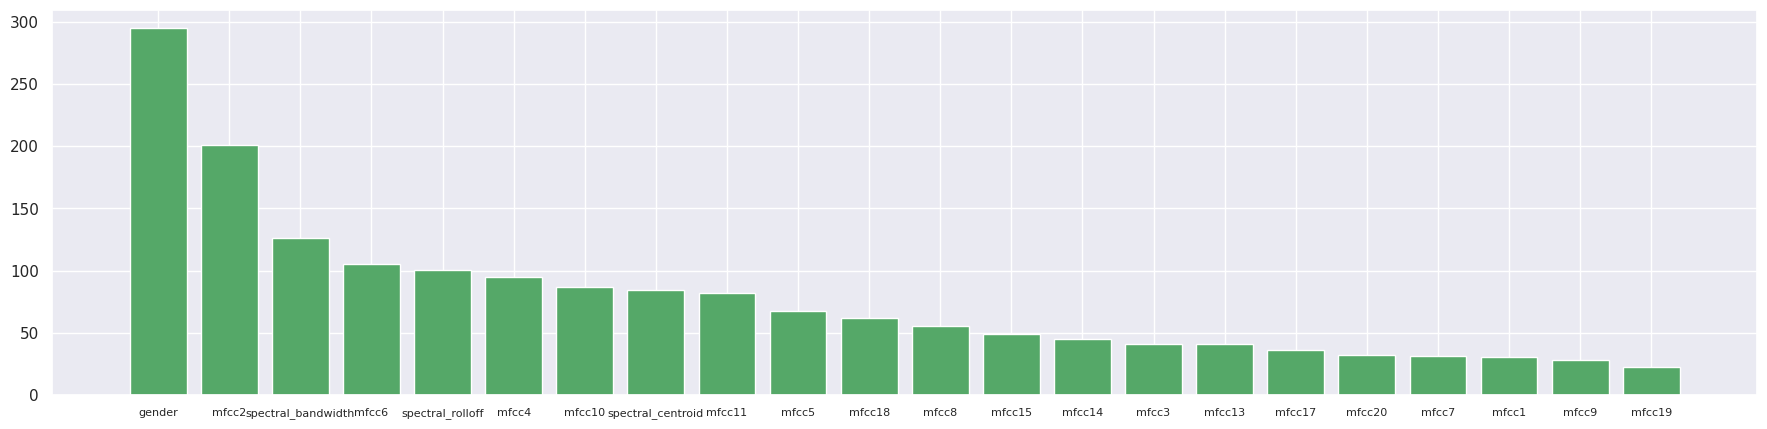

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

n_features = 22

f_selector = SelectKBest(f_classif, k=n_features).fit(x, y)
X_new = f_selector.transform(x)
scores = f_selector.scores_

indices = np.argsort(scores)[::-1]

features = []
for i in range(n_features):
    features.append(df_features.columns[indices[i]])

plt.figure(figsize=(22, 5))
plt.bar(features, scores[indices[range(n_features)]], color='g')
plt.xticks(fontsize=8)
plt.show()


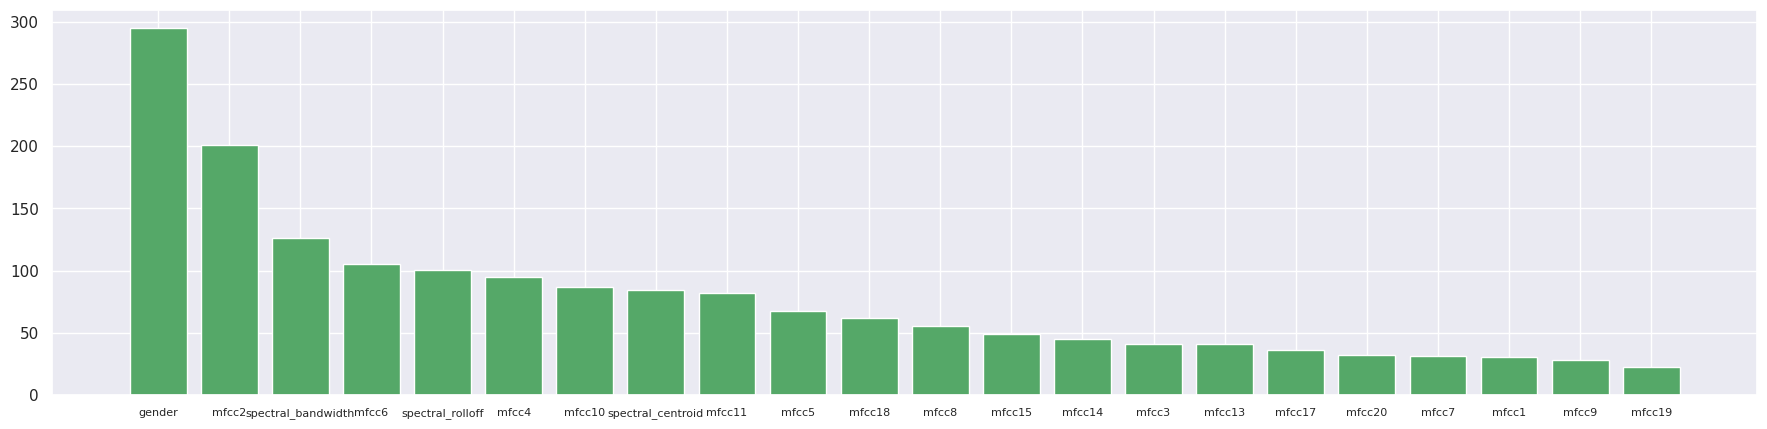

In [31]:
X_new_test = f_selector.transform(x_test)
scores_test = f_selector.scores_

indices_test = np.argsort(scores_test)[::-1]

features_test = []
for i in range(n_features):
    features_test.append(df_features_test.columns[indices_test[i]])

plt.figure(figsize=(22, 5))
plt.bar(features_test, scores_test[indices[range(n_features)]], color='g')
plt.xticks(fontsize=8)
plt.show()

### **Model Selection**  

Here, we consider two classifiers:

    Support Vector Machine
    Random Forest

We evaluate them with the K-Fold Cross-Validation technique. At each iteration of this outer cross-validation process, we tune the hyper-parameters of the classifiers with another (inner) Cross-Validation process , that will further divide the training set into training and validation data.

At each iteration of the outer CV process, we print the F1-Score obtained by the tuned classifier on the validation data, but also the F1-Score computed on the test data. Finally, we print the average F1-Scores computed on the test data at each step of the outer CV process.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

classifiers_and_params = [
    (SVC(), {'C': [200, 150, 100], 'gamma': ['auto', 'scale']}),
    (RandomForestClassifier(), {'n_estimators': [100, 150, 50,75,125,25]}),
    (GradientBoostingClassifier(), {'n_estimators': [100, 200, 1500], 'learning_rate':[1.0], 'max_depth':[3,6], 'random_state':[0]})
]

for tup in classifiers_and_params:
    print("{}".format(tup[0].__class__.__name__))

    # the main CV process
    outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)
    fold_counter = 0

    results = list()
    results_test = list()
    for train_idx, test_idx in outer_cv.split(X_new):
        fold_counter += 1

        # split data in training and test sets
        X_train, X_test = X_new[train_idx], X_new[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # the CV process used for the Grid Search
        inner_cv = KFold(n_splits=2, shuffle=True, random_state=0)

        # define and run the Grid Search CV process
        gs = GridSearchCV(tup[0], tup[1], scoring='f1_macro', cv=inner_cv, refit=True)
        res = gs.fit(X_train, y_train)

        # get the best model, re-fit on the whole training set
        best_model = res.best_estimator_

        # evaluation on the test set
        pred = best_model.predict(X_test)
        score = f1_score(y_test, pred, average='macro')
        results.append(score)

        print("\tFold {}, Best Params {} with F1 Score {:.3f}, F1 Score on Train data {:.3f}"
              .format(fold_counter, res.best_params_, res.best_score_, score))

                # evaluation on the test set
        pred = best_model.predict(X_new_test)
        score = f1_score(y_testt, pred, average='macro')
        results_test.append(score)
        print("\tFold {}, Best Params {} with F1 Score {:.3f}, F1 Score on Test data {:.3f}"
              .format(fold_counter, res.best_params_, res.best_score_, score))

    print('\tAverage F1 Score on Train Set: {:.3f}'.format(np.mean(results)))
    print('\tAverage F1 Score on Test Set: {:.3f}\n'.format(np.mean(results_test)))

SVC
	Fold 1, Best Params {'C': 100, 'gamma': 'scale'} with F1 Score 0.728, F1 Score on Train data 0.804
	Fold 1, Best Params {'C': 100, 'gamma': 'scale'} with F1 Score 0.728, F1 Score on Test data 0.807
	Fold 2, Best Params {'C': 100, 'gamma': 'auto'} with F1 Score 0.726, F1 Score on Train data 0.797
	Fold 2, Best Params {'C': 100, 'gamma': 'auto'} with F1 Score 0.726, F1 Score on Test data 0.776
	Fold 3, Best Params {'C': 100, 'gamma': 'auto'} with F1 Score 0.717, F1 Score on Train data 0.797
	Fold 3, Best Params {'C': 100, 'gamma': 'auto'} with F1 Score 0.717, F1 Score on Test data 0.700
	Average F1 Score on Train Set: 0.799
	Average F1 Score on Test Set: 0.761

RandomForestClassifier
	Fold 1, Best Params {'n_estimators': 125} with F1 Score 0.597, F1 Score on Train data 0.684
	Fold 1, Best Params {'n_estimators': 125} with F1 Score 0.597, F1 Score on Test data 0.592
	Fold 2, Best Params {'n_estimators': 150} with F1 Score 0.590, F1 Score on Train data 0.677
	Fold 2, Best Params {'n_e

In [ ]:
import itertools
import matplotlib.pyplot as plt

def my_plot_confusion_matrix(cm, classes, normalize=False):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = "Normalized Confusion Matrix"
    else:
        title = "Confusion Matrix (without normalization)"

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.title(title)

    thresh = cm.max() / 2.
    fmt = "{:0.2f}" if normalize else "{:d}"
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, fmt.format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

model = SVC(C=100, gamma='scale')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure()
my_plot_confusion_matrix(cm, classes=classes)

plt.grid(False)
plt.show()

In [ ]:
# Plot normalized confusion matrix
plt.figure()
my_plot_confusion_matrix(cm, classes=classes, normalize=True)

plt.grid(False)
plt.show()



In [ ]:
import joblib
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(model, filename)